In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_absolute_error
import warnings

# Could You Be at Risk of Getting Diabetes?

## Data Understanding 

In [2]:
# load data
warnings.filterwarnings(action="ignore")
dia = pd.read_csv('data/diabetes.csv')

In [3]:
dia.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
197,3,107,62,13,48,22.9,0.678,23,1
130,4,173,70,14,168,29.7,0.361,33,1


In [4]:
dia.info()
# Input data are all numeric format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Check if training data has NaNN 
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Luckily data does not have Null value
# Next check data summary
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
list(dia.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
# I can see Pregnancies Glucose BloodPressure SkinThickness Insulin and BMI all have min value == 0
# Per my understanding it should be impossible, we can need to analysize and deal with that.

## Data Clean

In [9]:
col_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(dia==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
dia.shape

(768, 9)

In [11]:
# replace 0 as np.nan
dia[col_with_zero] = dia[col_with_zero].replace(0, np.nan)

In [12]:
dia[col_with_zero].isnull().sum() / dia.shape[0]

Glucose          0.006510
BloodPressure    0.045573
SkinThickness    0.295573
Insulin          0.486979
BMI              0.014323
dtype: float64

In [13]:
# For Glucose, we can fit in the mean value with very low missing rate
dia['Glucose'].fillna(dia['Glucose'].mean(), inplace=True)

In [14]:
# BloodPressure can we can fit the mod value since missing rate is 4%
dia['BloodPressure'].fillna(dia['BloodPressure'].mean(), inplace=True)

In [15]:
# BMI same treatment as mean
dia['BMI'].fillna(dia['BMI'].mean(), inplace=True)

In [16]:
# Deal with SkinThickness and Insulin which has high missing rate
# I am thinking to use KNNImputer
imputer = KNNImputer(n_neighbors=5)
dia[col_with_zero] = imputer.fit_transform(dia[col_with_zero])

In [17]:
# After processing, all columns are filled within with data.
dia[col_with_zero].isnull().sum() / dia.shape[0]

Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64

## Data Visualization

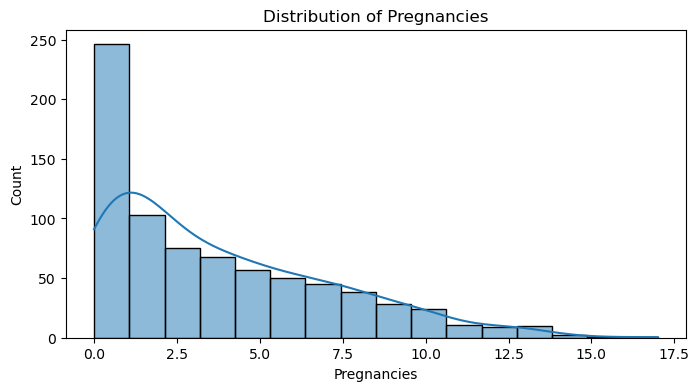

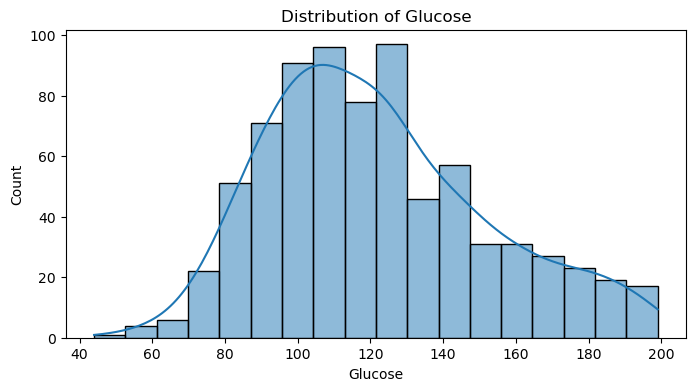

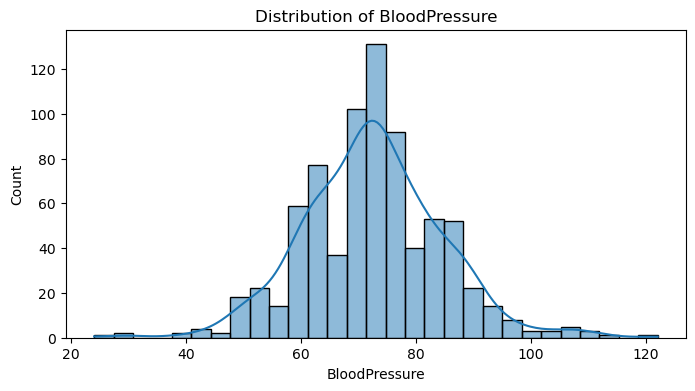

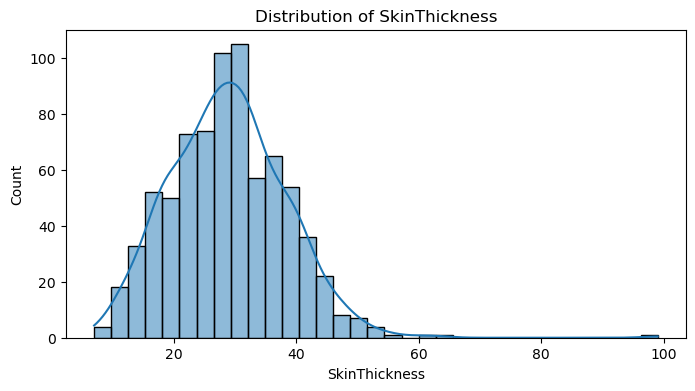

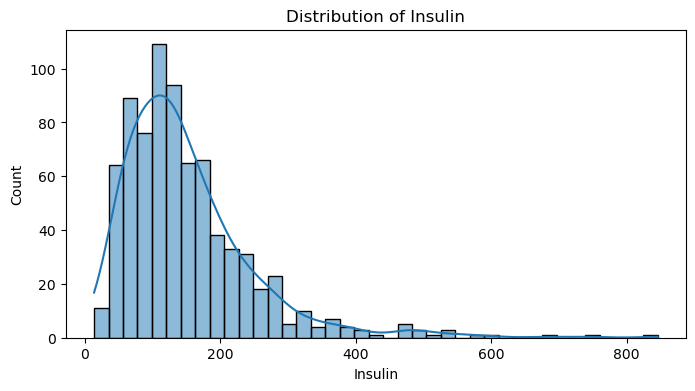

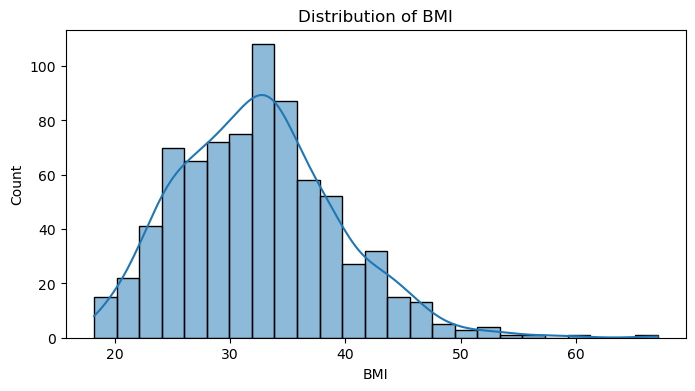

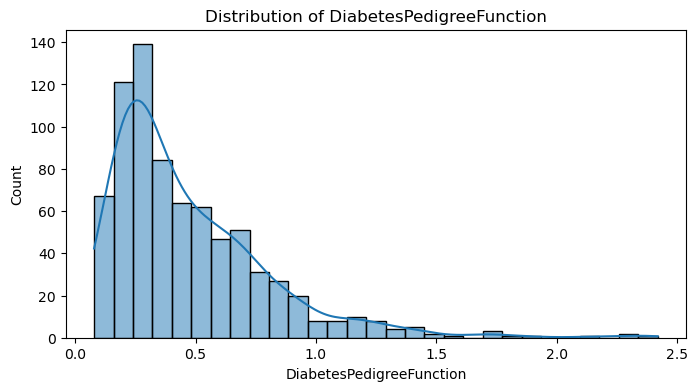

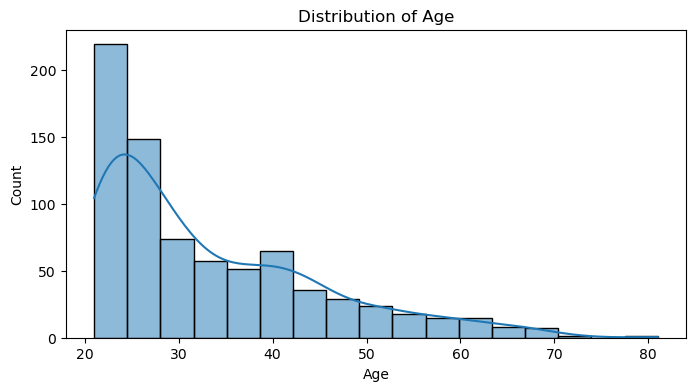

In [18]:
# Hostplot for each columns removing outcome
cols_without_outcome = dia.columns.drop('Outcome')
for col in cols_without_outcome:
    plt.figure(figsize=(8, 4))
    sns.histplot(dia[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

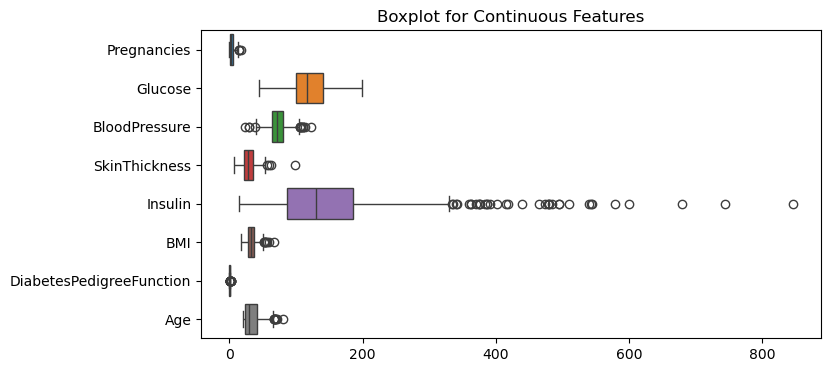

In [19]:
# boxplot to check outliers 
plt.figure(figsize=(8, 4))
sns.boxplot(data=dia[cols_without_outcome], orient='h')
plt.title('Boxplot for Continuous Features')
plt.show()

In [20]:
# Looks like insulin might have much more outliers, which is due to missing data that I am using knn imputer to fill it.

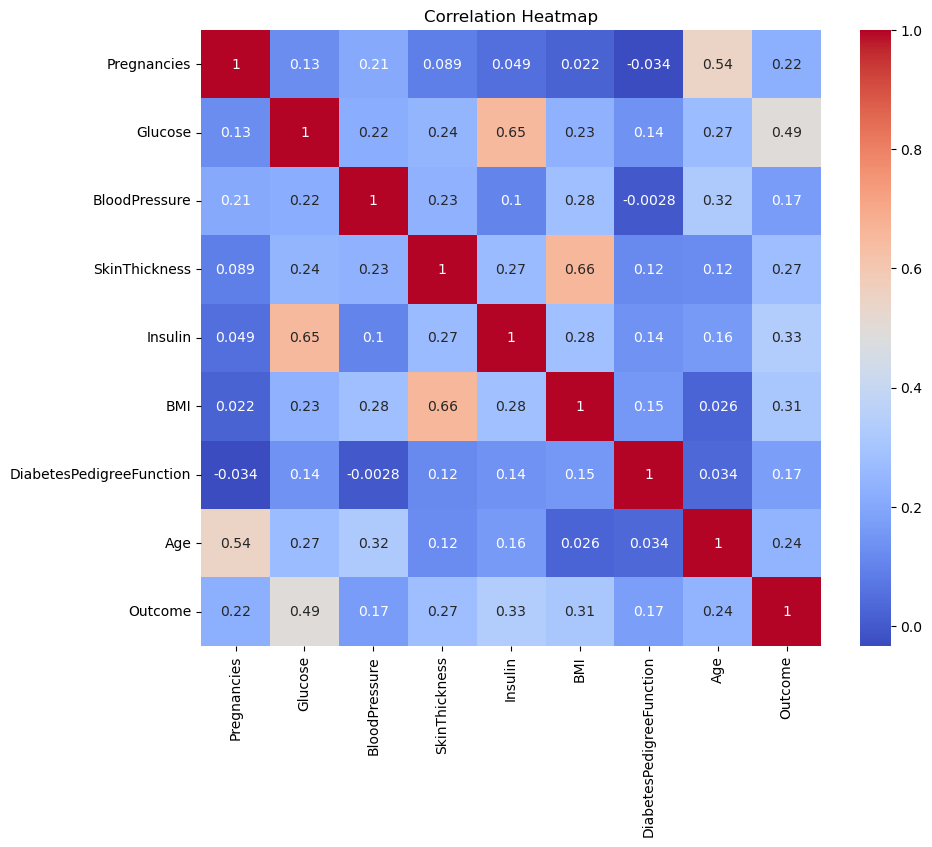

In [21]:
# Let's view coorrelations
plt.figure(figsize=(10, 8))
sns.heatmap(dia.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Per correlation
- Glucose and Outcome: Glucose shows a strong positive correlation with Outcome (0.49)
- BMI and Outcome: This indicates that higher BMI values may also contribute to a higher risk of diabetes
- Insulin and Outcome: Insulin has a moderate correlation with Outcome (0.33), which aligns with its role in blood sugar regulation and diabetes.I feel it might have stronger relationship, which may due to my loss data recovery
- Glucose and Insulin: There is a strong correlation between Glucose and Insulin (0.65),which reflects biological relationship
- BMI and SkinThickness: It is new to me, after do some research: This is logical, as thicker skinfold measurements often indicate higher body fat levels, which contribute to BMI.

## Apply AI Model

In [22]:
# Here I want to use different AI model to predict the outcome, since it is classification problem with supervisted learning
# 1 Logstic regression
# 2 KNN
# 3 Decsion Tree


In [23]:
# Split data
# Remove column of Pregnancies
X = dia[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dia['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [26]:
# Apply Logstic Regression
log_reg = LogisticRegression(random_state = 42).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

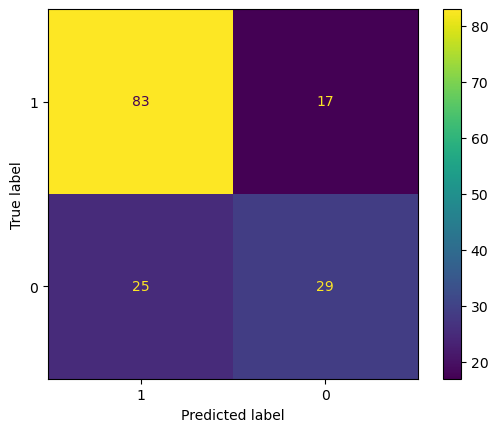

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix, display_labels=[1, 0])
disp1.plot()

## Evaluation

In [28]:
from re import M
# MAE for Logistic Regression
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.2727272727272727
